## **TAXI ROUTE OPTIMIZATION WITH REINFORCEMENT LEARNING**

In [41]:
# Re-run this cell to install and import the necessary libraries and load the required variables
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Seed the environment for reproducibility
#env.np_random, _ = seeding.np_random(42)
#env.action_space.seed(42)
#np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100 

In [42]:
# Start coding here
# Feel free to add as many cells as you want
max_episodes=2000
num_actions=env.action_space.n
num_states=env.observation_space.n
alpha=0.99
gamma=0.1
epsilon=1
epsilon_decay=0.999
episode_returns=[]
q_table=np.zeros((num_states,num_actions))
print(num_actions,num_states)

6 500


In [43]:
def epsilon_greedy(state):
    if np.random.rand()<epsilon:
        action=env.action_space.sample()
    else:
        action=np.argmax(q_table[state,:])
    return action
    
    

In [44]:
def update_q_table(state,action,next_state,reward):
    old_value=q_table[state,action]
    next_max=np.max(q_table[next_state])
    #expected_q=np.mean(Q[next_state])
    q_table[state,action]=(1-alpha)*old_value+alpha*(reward+gamma*next_max)

In [45]:
for episodes in range(max_episodes):
    state,_=env.reset()
    terminated=False
    truncated=False
    actions_count=0
    episode_reward=0
    while not terminated and actions_count <100:
        action=epsilon_greedy(state)
        new_state,reward,terminated,truncated,_=env.step(action)
        update_q_table(state,action,new_state,reward)
        state=new_state
        actions_count+=1
        episode_reward+=reward
    episode_returns.append(episode_reward)
    epsilon=max(0.01,epsilon*epsilon_decay)
    
    

In [46]:
def get_policy():
    return {state:np.argmax(q_table[state]) for state in range(num_states)}
policy=get_policy()

In [47]:
frames = []
state, _ = env.reset()
terminated = False
truncated = False

def render(state):
    frame = env.render()
    frames.append(frame)
actions_count=0
episode_total_reward=0
while not terminated and not truncated and actions_count<16:
    action = policy[state]
    new_state, reward, terminated, truncated, _ = env.step(action)
    render(state)
    state = new_state
    actions_count+=1
    episode_total_reward+=reward

In [48]:
print(actions_count,episode_total_reward)

9 12


In [49]:
print(policy)

{0: np.int64(0), 1: np.int64(4), 2: np.int64(4), 3: np.int64(4), 4: np.int64(0), 5: np.int64(0), 6: np.int64(0), 7: np.int64(0), 8: np.int64(0), 9: np.int64(0), 10: np.int64(0), 11: np.int64(0), 12: np.int64(0), 13: np.int64(0), 14: np.int64(2), 15: np.int64(0), 16: np.int64(5), 17: np.int64(0), 18: np.int64(0), 19: np.int64(0), 20: np.int64(0), 21: np.int64(3), 22: np.int64(3), 23: np.int64(3), 24: np.int64(0), 25: np.int64(0), 26: np.int64(0), 27: np.int64(0), 28: np.int64(0), 29: np.int64(3), 30: np.int64(0), 31: np.int64(3), 32: np.int64(0), 33: np.int64(0), 34: np.int64(0), 35: np.int64(0), 36: np.int64(3), 37: np.int64(0), 38: np.int64(0), 39: np.int64(0), 40: np.int64(0), 41: np.int64(0), 42: np.int64(0), 43: np.int64(0), 44: np.int64(2), 45: np.int64(0), 46: np.int64(2), 47: np.int64(2), 48: np.int64(0), 49: np.int64(0), 50: np.int64(0), 51: np.int64(0), 52: np.int64(0), 53: np.int64(0), 54: np.int64(0), 55: np.int64(0), 56: np.int64(0), 57: np.int64(2), 58: np.int64(0), 59: np

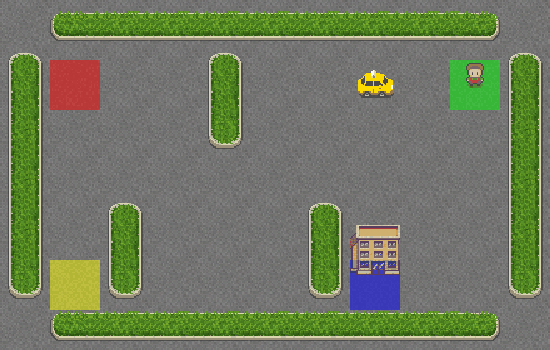

In [50]:
# Once you are done, run this cell to visualize the agent's behavior through the episode
# Save frames as a GIF
imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5, loop=0)

# Display GIF
gif_path = "taxi_agent_behavior.gif" 
Image(gif_path) 